In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Acquisition

In [118]:
data = pd.read_excel('Telco_customer_churn.xlsx')

In [119]:
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


## Exploratory Data Analyses

In [120]:
data.info()
# Upon loading the data, we can see that there are 7043 rows and 33 columns.
# The Churn reason variable has 5174 missing values, which is expected since only customers who churned provided a reason.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [121]:
data['Churn Reason'].unique()

# The Churn Reason column contains the reasons why customers churned. We can see that there are 20 unique reasons in additon to missing values.
# During the data preprocessing stage, we will drop the Churn Reason column since it will introduce data leakage into the model.

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [122]:
check = data[(data['Churn Label'] == 'Yes') & (pd.isna(data['Churn Reason']))]
check2 = data[(data['Churn Label'] == 'No') & (pd.isna(data['Churn Reason']))]
print(check)

# What I noticed is that the Churn Reason column is missing for customers who did not churn. This is expected since only customers who churned provided a reason.

Empty DataFrame
Columns: [CustomerID, Count, Country, State, City, Zip Code, Lat Long, Latitude, Longitude, Gender, Senior Citizen, Partner, Dependents, Tenure Months, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges, Churn Label, Churn Value, Churn Score, CLTV, Churn Reason]
Index: []

[0 rows x 33 columns]


In [123]:
data.select_dtypes(include='object').columns.tolist()

# From the result below, certain columns shouldn't be categorical in nature like 'TotalCharges' and 'Lat Long'. 
# These columns should be converted to numerical columns.
# Certain columns like 'CustomerID' and 'Count' should be dropped as they don't provide any useful information.
# Churn Label will also be dropped because it is a duplicate of the Churn Value column.

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label',
 'Churn Reason']

In [124]:
data.select_dtypes(include= ['float64' , 'int']).columns.tolist()

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

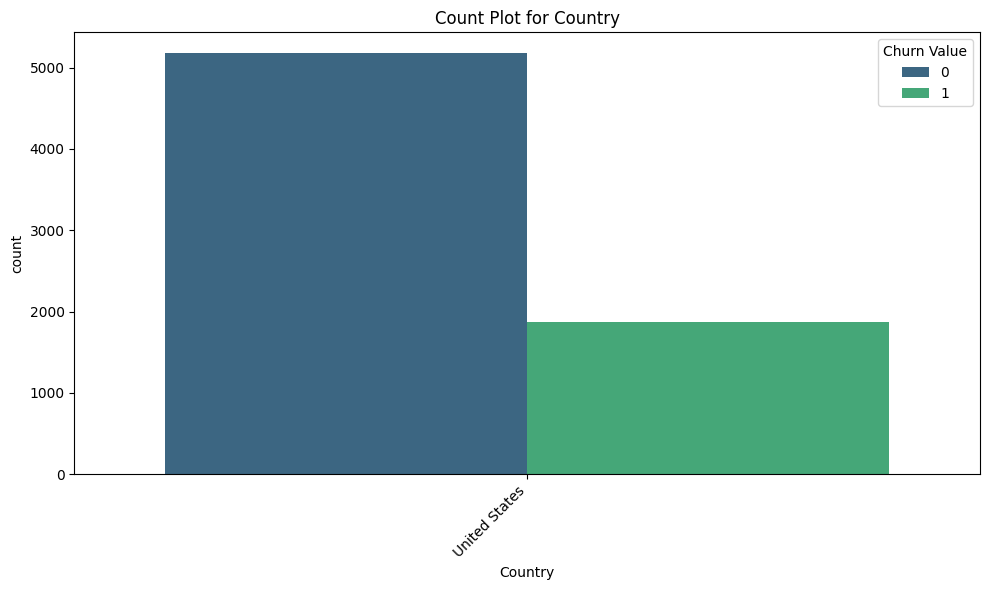

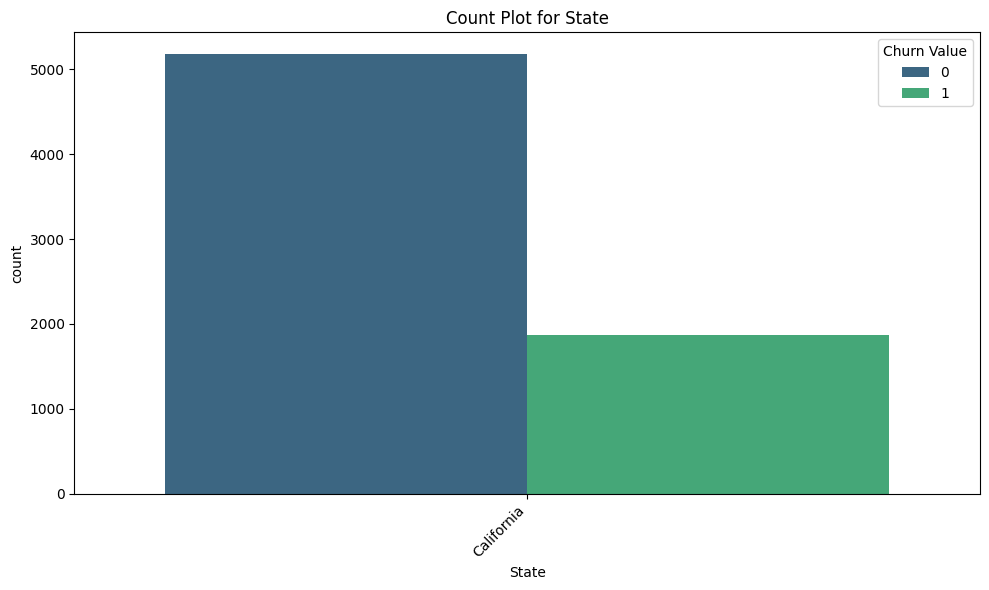

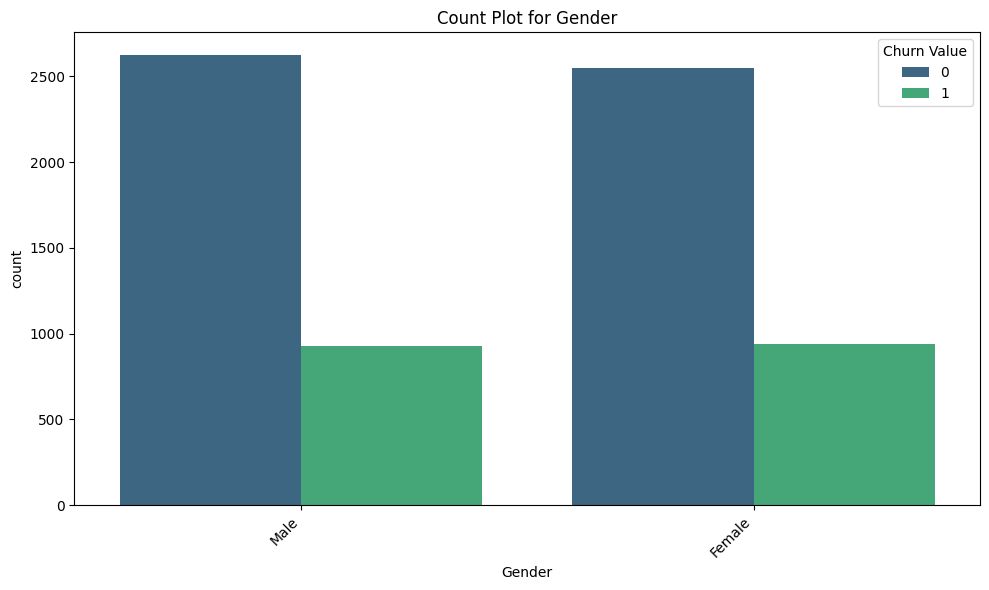

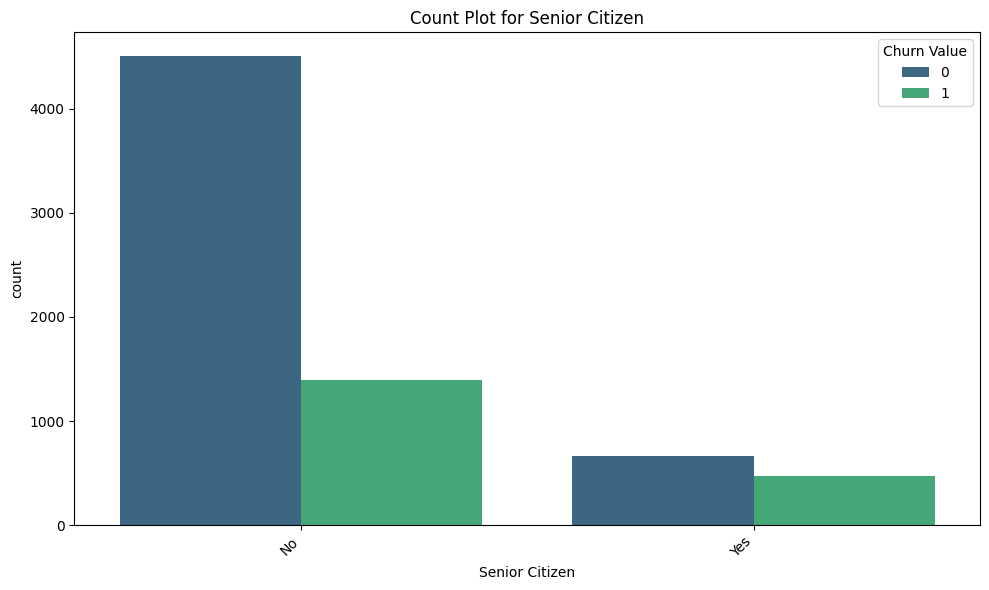

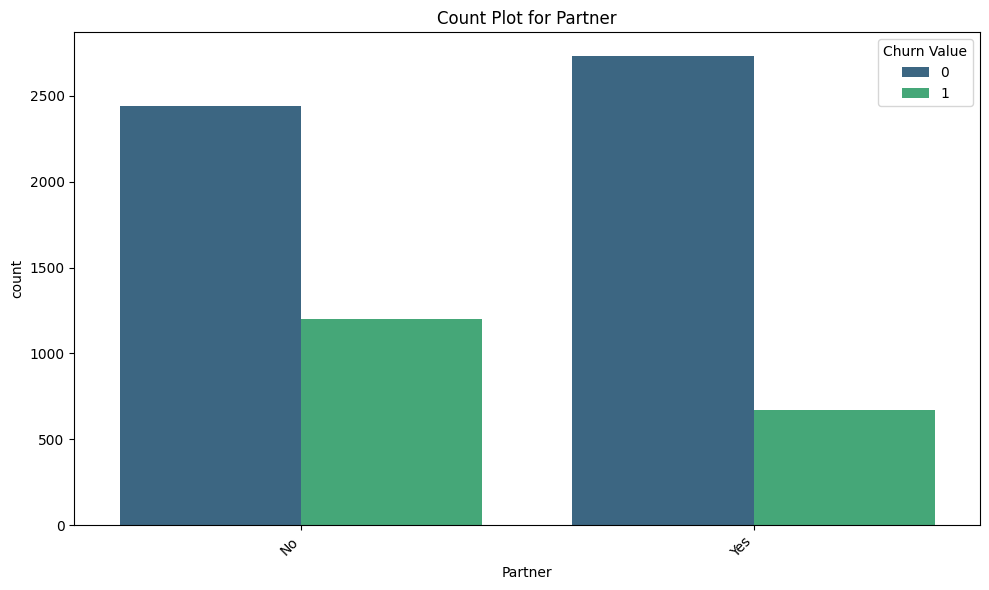

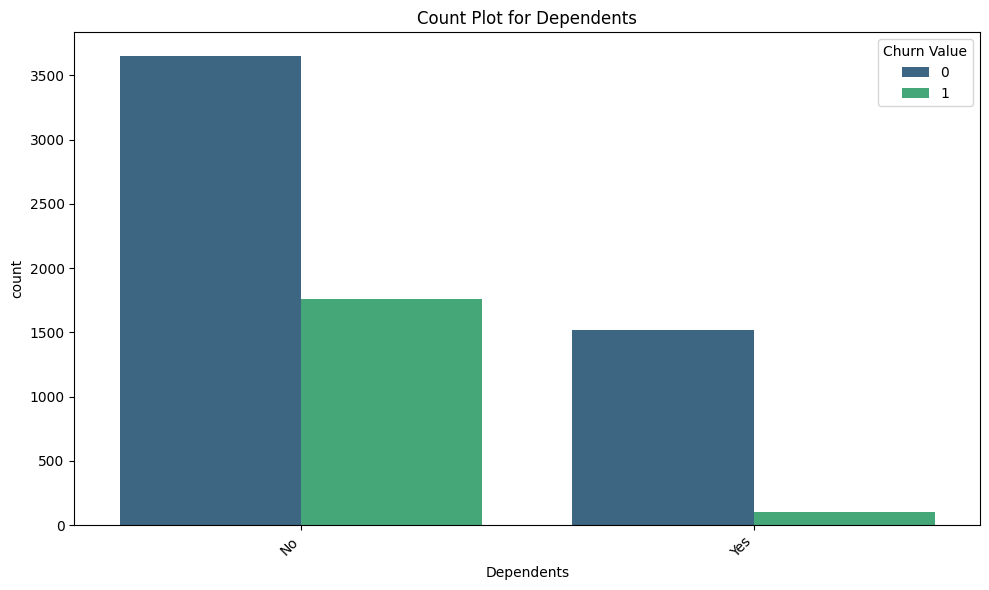

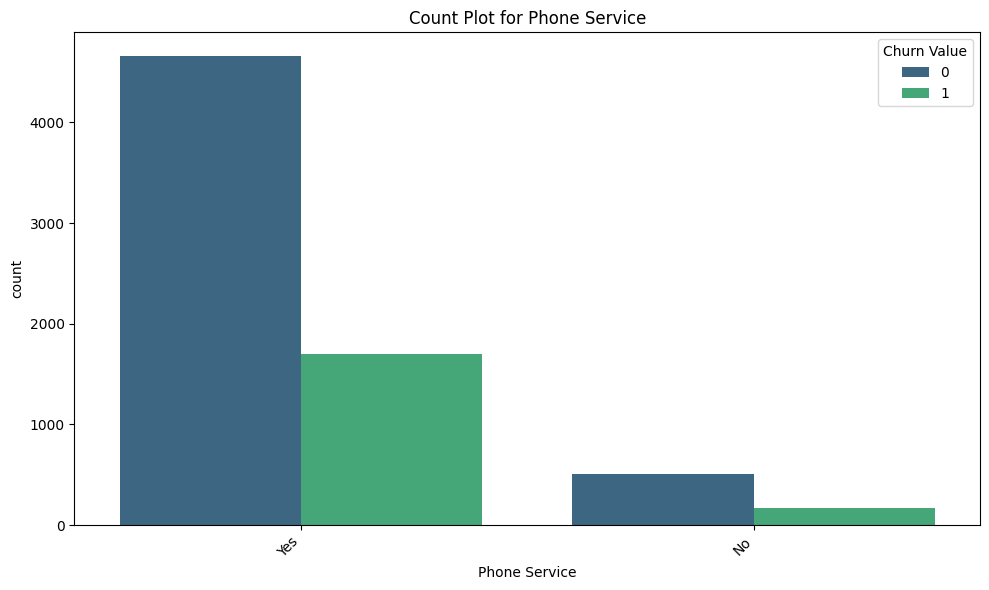

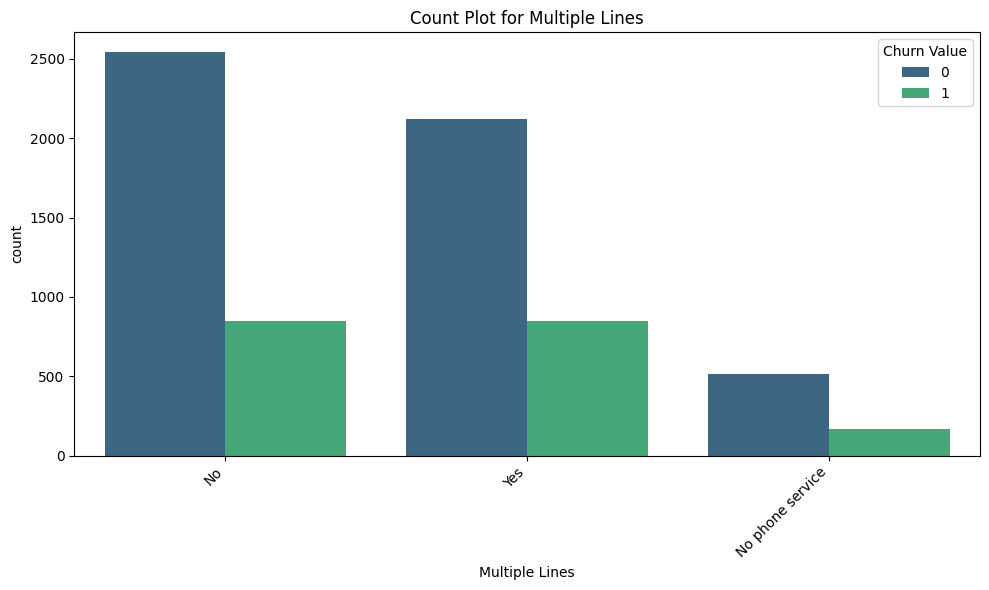

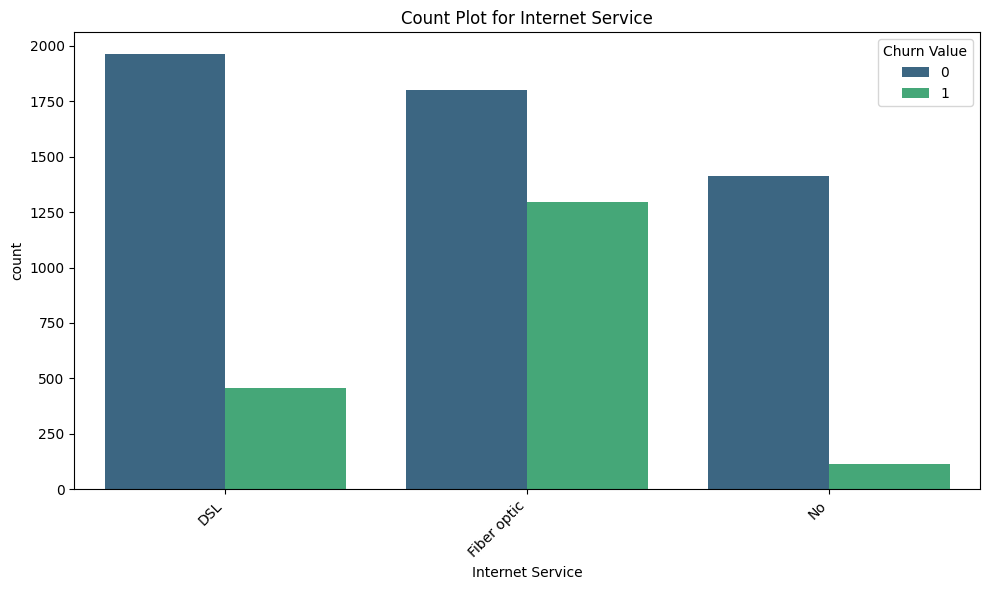

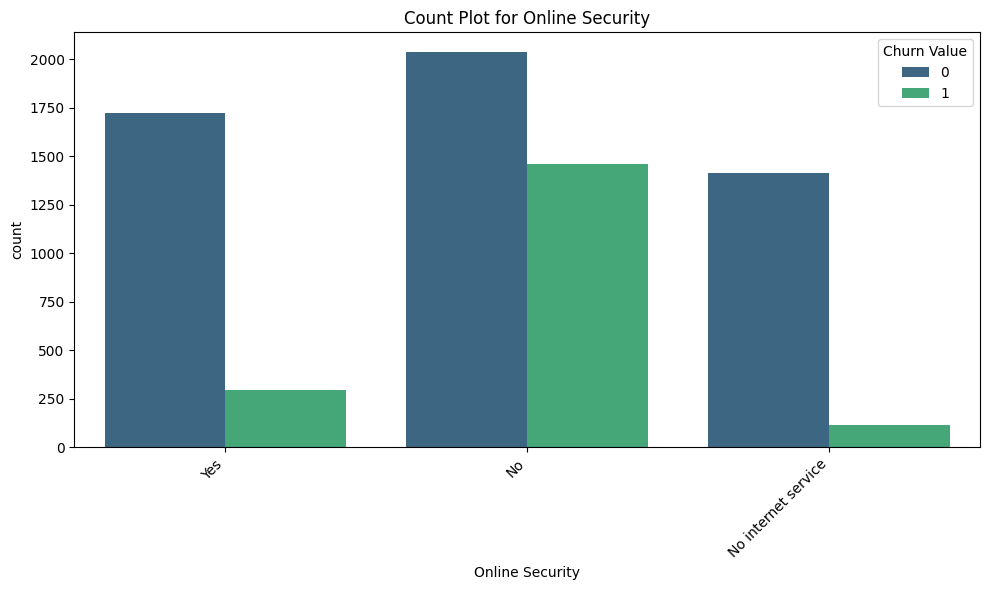

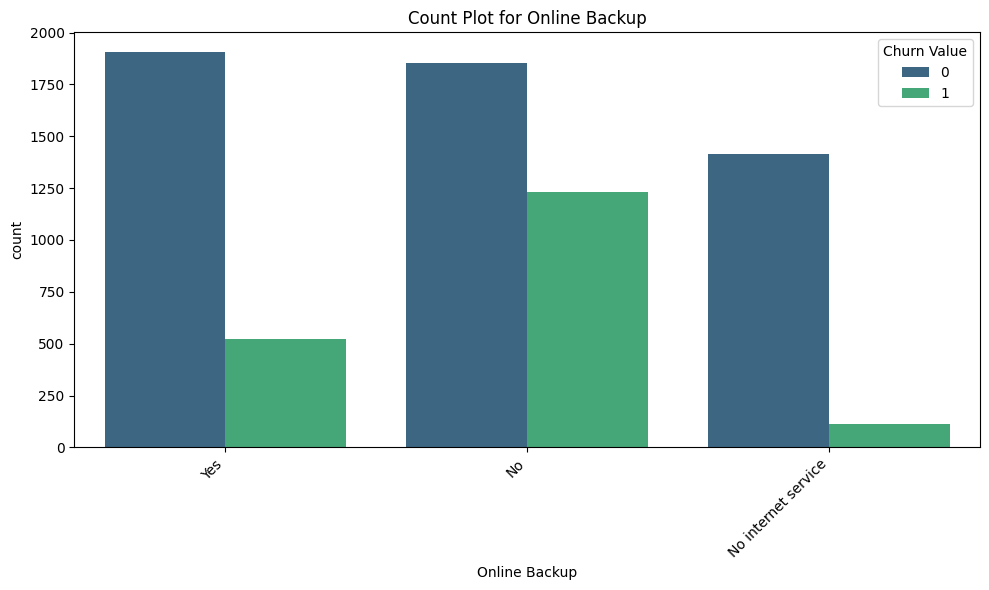

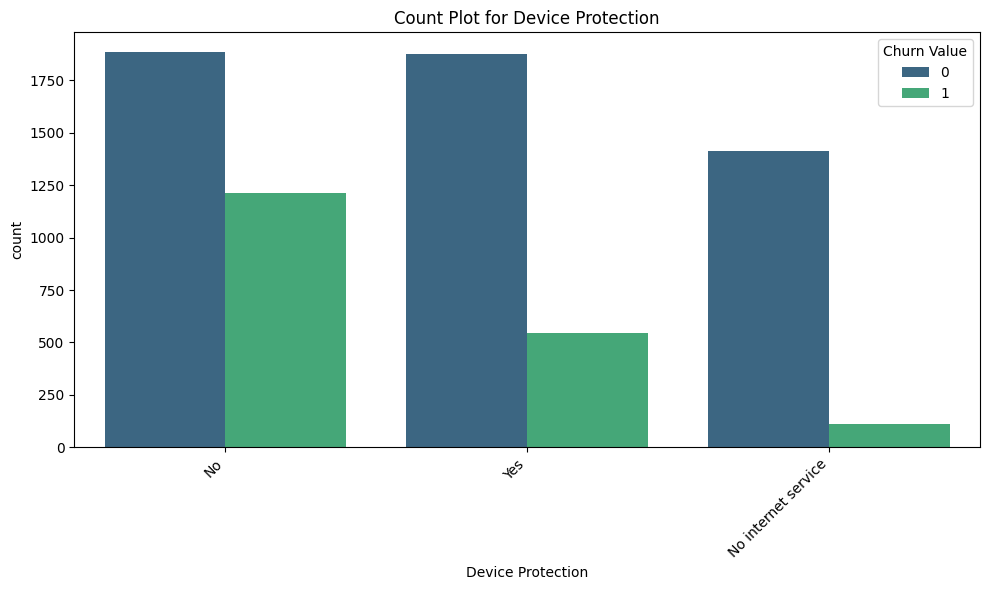

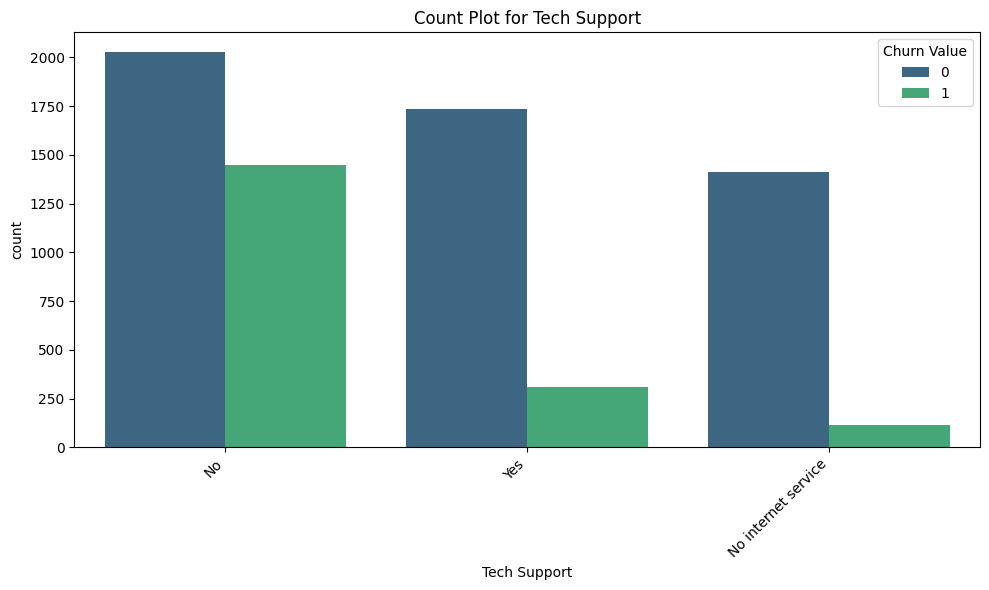

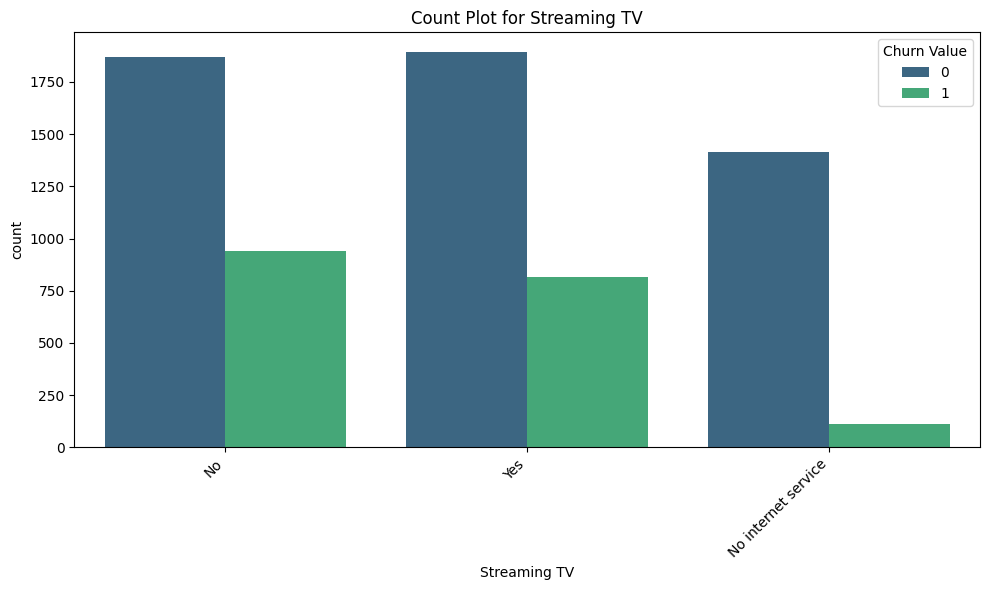

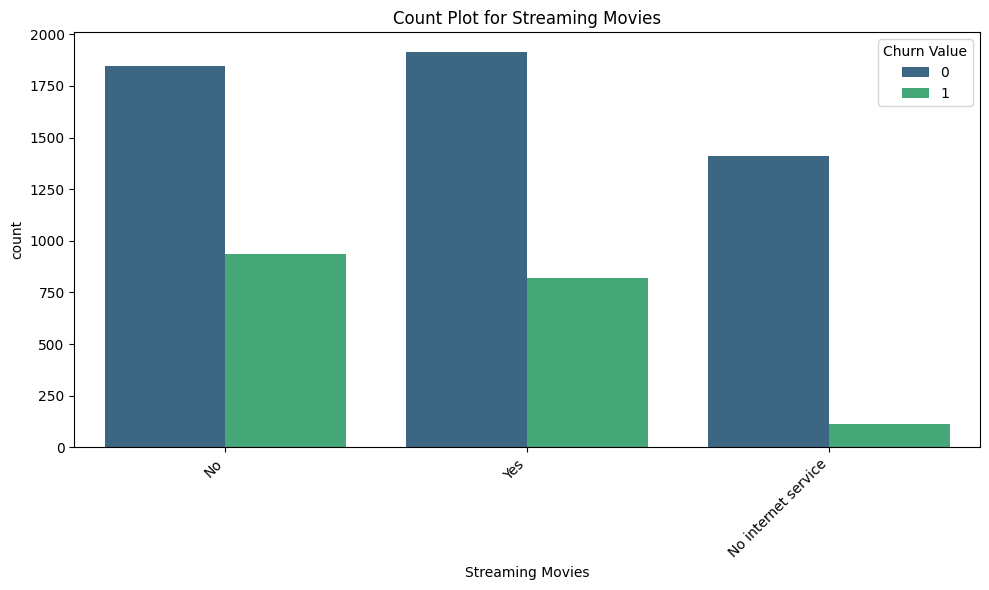

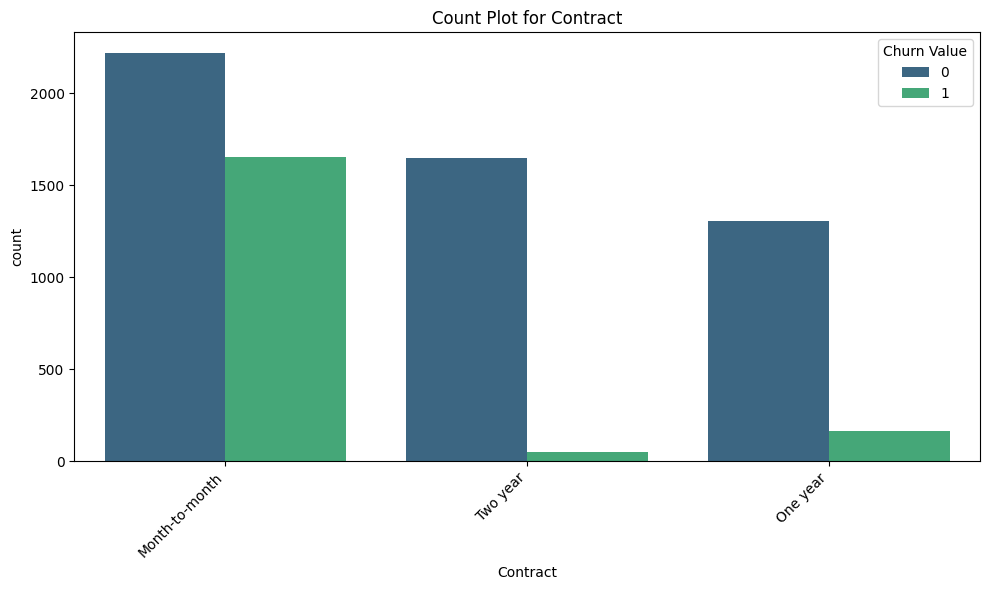

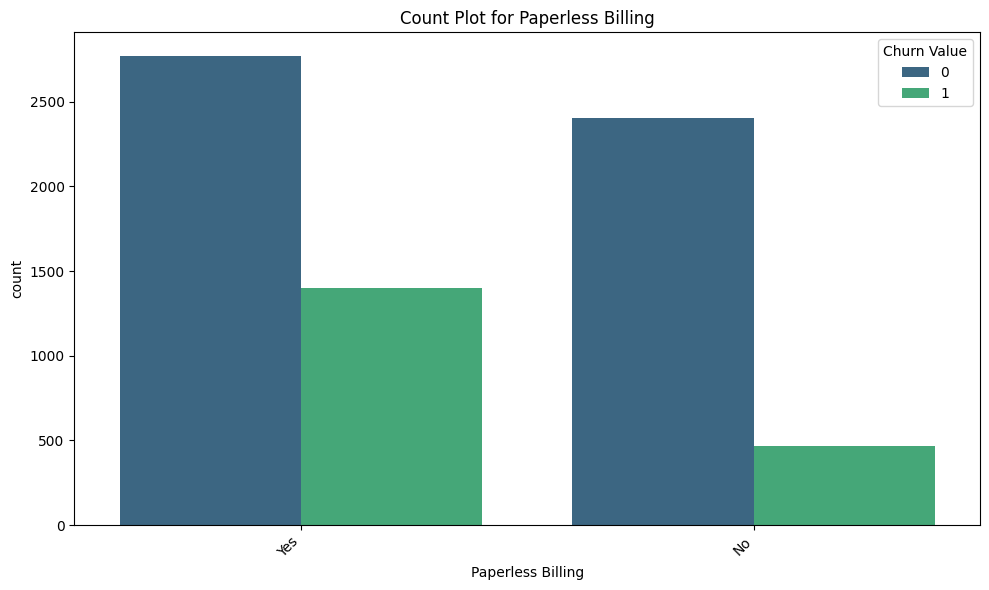

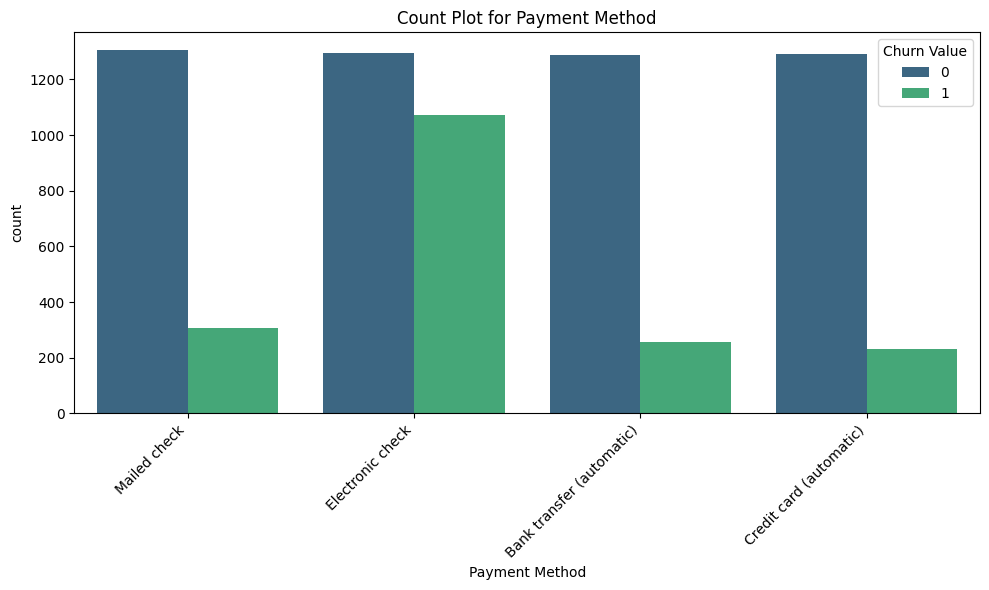

In [125]:
# List of categorical columns
categorical_columns = [
    'Country', 'State', 'Gender', 'Senior Citizen', 'Partner',
    'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
    'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'
]

# Create count plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, palette='viridis', hue='Churn Value')
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Data Preprocessing

In [127]:
data.drop(columns = ['Churn Label', 'Churn Reason', 'CustomerID', 'Count'], inplace= True)

# Dropped the columns that are not useful for the analysis

In [128]:
columns = ['Total Charges', 'Lat Long']

# Convert each column from object to int, handling errors
for column in columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert non-numeric values to NaN
    data[column] = data[column].fillna(0).astype(int)

In [129]:
data.drop(columns = ['Country', 'State', 'Lat Long', 'Latitude', 'Longitude'], inplace= True)

# Dropped the Country and State columns because they are single unique values and,
# The Lat Long, Latitude, and Longitude columns because they are not useful for the analysis as we already have the City column.


In [130]:
data['Zip Code'] = data['Zip Code'].astype(str)

In [131]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns to label encode
label_encode_columns = ['City', 'Zip Code']

# Apply label encoding
for column in label_encode_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Columns to one-hot encode
one_hot_encode_columns = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method'
]

# Apply one-hot encoding
df = pd.get_dummies(data, columns=one_hot_encode_columns, drop_first=True)

# Convert boolean columns to integers
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [132]:
df

,City,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,562,2,2,53.85,108,1,86,3239,1,0,...,0,0,0,0,0,0,1,0,0,1
1,562,4,2,70.70,151,1,67,2701,0,0,...,0,0,0,0,0,0,1,0,1,0
2,562,5,8,99.65,820,1,86,5372,0,0,...,0,1,0,1,0,0,1,0,1,0
3,562,8,28,104.80,3046,1,84,5003,0,0,...,0,1,0,1,0,0,1,0,1,0
4,562,13,49,103.70,5036,1,89,5340,1,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,521,429,72,21.15,1419,0,45,5306,0,0,...,1,0,1,0,0,1,1,0,0,0
7039,2,430,24,84.80,1990,0,59,2140,1,0,...,0,1,0,1,1,0,1,0,0,1
7040,22,431,72,103.20,7362,0,71,5560,0,0,...,0,1,0,1,1,0,1,1,0,0
7041,26,432,11,29.60,346,0,59,2793,0,0,...,0,0,0,0,0,0,1,0,1,0


## Data Modeling

### ML Modeling with Linear Regression

In [133]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Churn Value'])
y = df['Churn Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression RMSE: 0.30002326064658846


c:\Users\danie\Downloads\eze_dca\telcovenv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
